# __Time Series Modeling:__ _Exploratory Data Analysis_

## ___Notebook 2:___ _Histograms and the Kernel Density Estimator_

_By: Trevor Rowland_ ([@dBCooper2](https://github.com/dBCooper2))

## _References_

## _Table of Contents_

Data Collection

Histograms

The Kernel Density Estimator

## Data Collection

The data for the next chapters in Python will be pulled from the Semiconductor Industry CSVs used in the Returns notebook.

The company used will be APH. The data accessed will be daily candle data from 2019 to 2024.

_(ARM was skipped over because its data only reaches back to 2023)_

In [24]:
# Import Libraries
import pandas as pd
import numpy as np
import pygwalker as pyg

In [36]:
aph_daily_fn = '/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/APH/APH_Candles_Daily.CSV'
aph_d_df = pd.read_csv(aph_daily_fn)

aph_d_df.set_index(aph_d_df['Date'], inplace=True)
aph_d_df = aph_d_df.drop(columns='Date')

aph_d_df = aph_d_df.filter(items=['Date', 'Adj Close'])
aph_d_df = aph_d_df.rename(columns={'Adj Close':'Adj_Close'})

aph_d_df.head()

,Adj_Close
Date,
2019-01-25,41.033318
2019-01-28,40.771805
2019-01-29,40.923958
2019-01-30,41.941471
2019-01-31,41.803589


### _Define the Returns Functions_

_From returns_notes.ipynb_ [ADD LINK LATER]

In [5]:
# Net Return and Log Return Functions:
def get_net_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Net_Return']= df[col_name].pct_change(periods=num_periods)
    return df

def get_log_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Log_Return'] = np.log(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

# New one for Transformations: Root Returns
def get_root_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Root_Return'] = np.sqrt(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

### _Collect Net, Log, and Root Returns for the DataFrame_ 

In [37]:
aph_df = get_net_returns(aph_d_df, 'Adj_Close', 1)
aph_df = get_log_returns(aph_df, 'Adj_Close', 1)
aph_df = get_root_returns(aph_df, 'Adj_Close', 1)

aph_df.head()

,Adj_Close,Net_Return,Log_Return,Root_Return
Date,,,,
2019-01-25,41.033318,NaN,NaN,NaN
2019-01-28,40.771805,-0.006373,-0.006394,0.996808
2019-01-29,40.923958,0.003732,0.003725,1.001864
2019-01-30,41.941471,0.024864,0.024559,1.012355
2019-01-31,41.803589,-0.003287,-0.003293,0.998355


## Histograms

The Histogram is a good first estimator to see what the distributions of the data look like, and are a good starting point before diving into more complicated estimators like the KDE and CDF.

### _Imports and Setting Styles:_

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

### _Creating the Histogram_

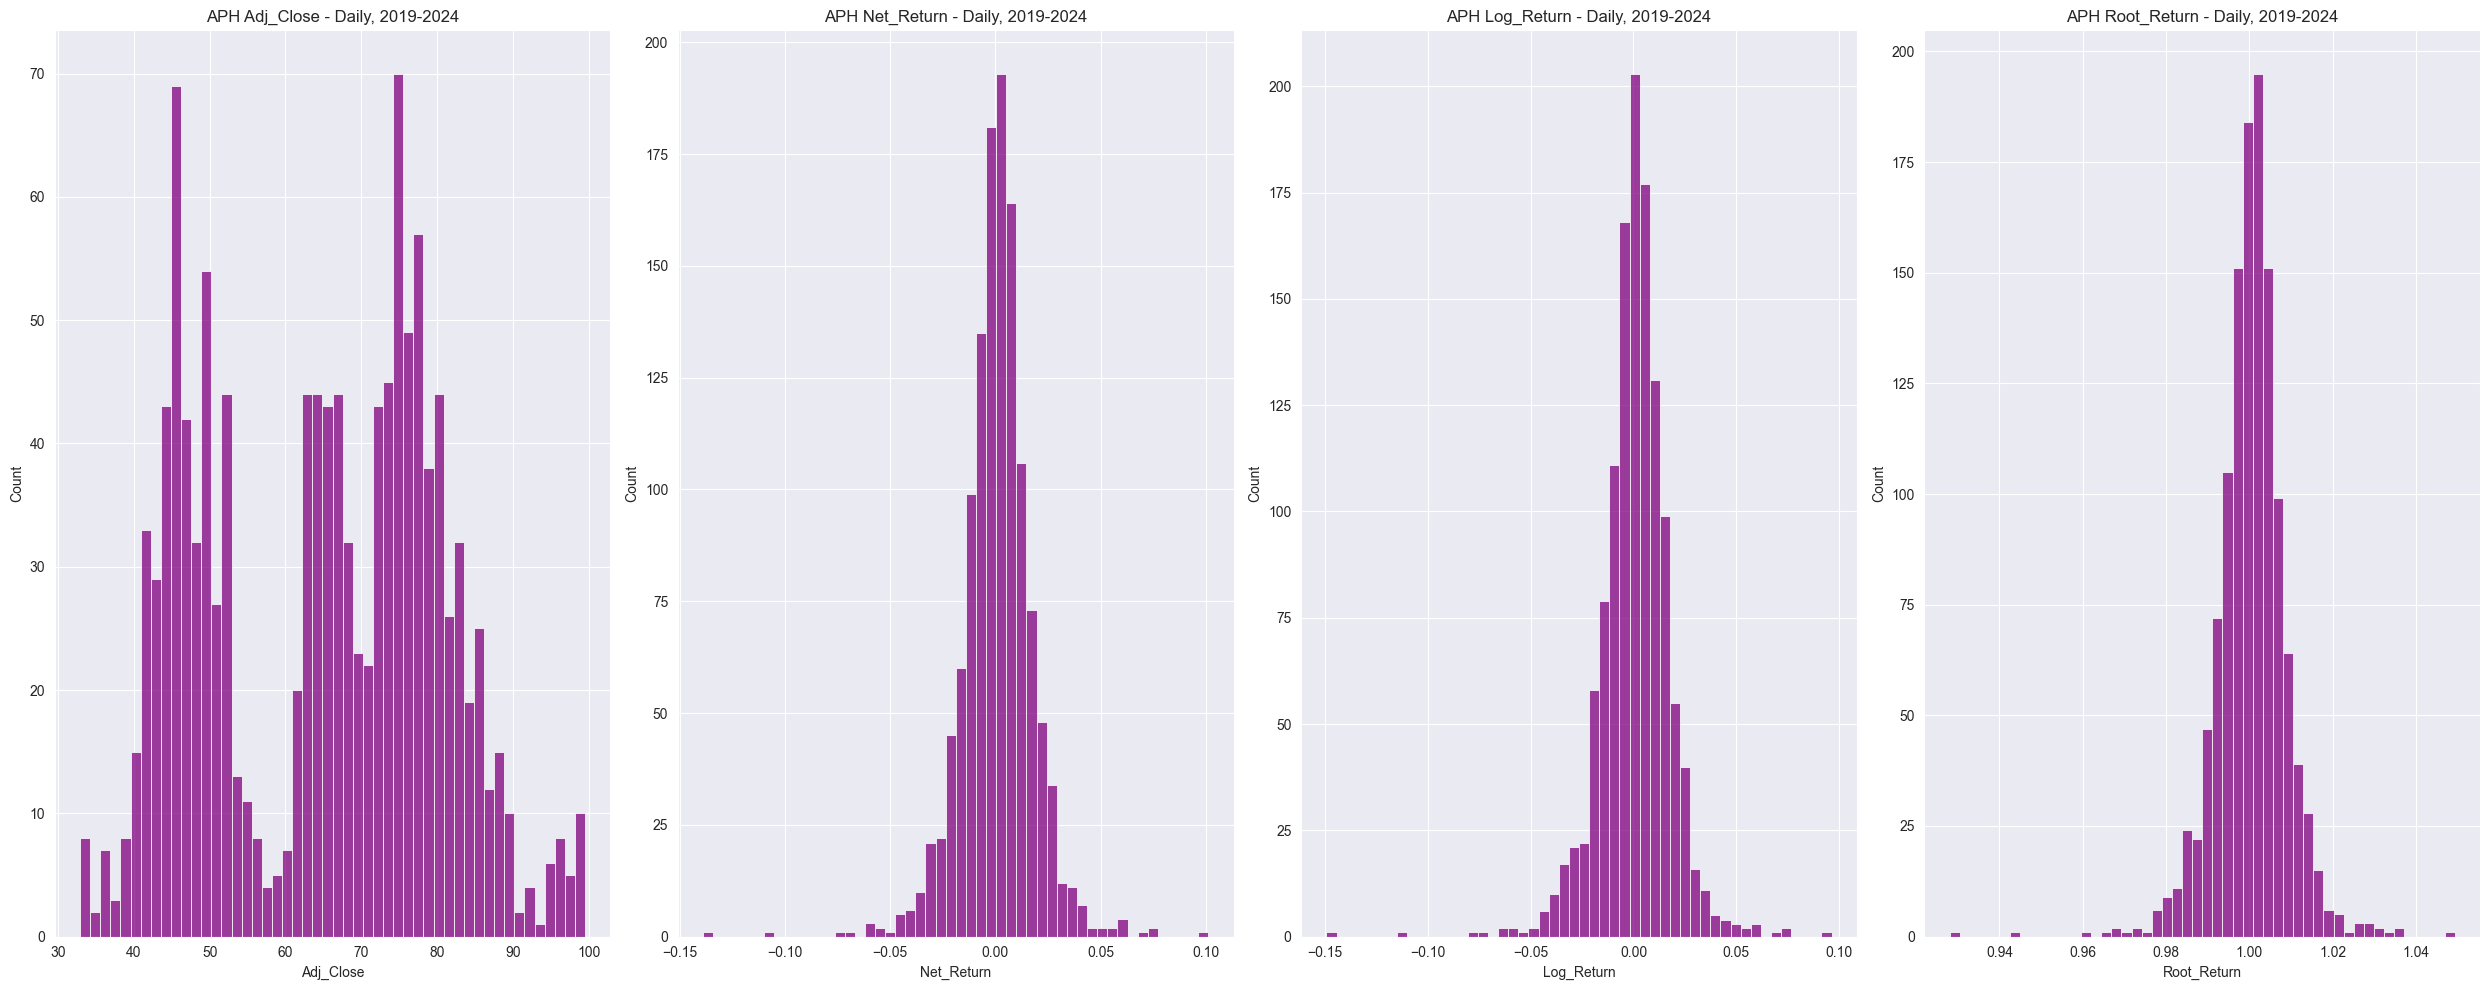

In [45]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(25, 10))

# Loop through the subplots and add the histograms
i=0
cols = aph_df.columns.to_list()
while i<len(cols):
    sns.histplot(data=aph_df[cols[i]].dropna(), ax=axs[i], bins=50, color='purple')
    axs[i].set_title(f'APH {cols[i]} - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Here are the probability distributions for APH. The graphs are in order from left to right and plot the Daily Adjusted Closing Price, Net Returns, Log Returns, and Root Returns of the stock.

The Adjusted Closing Prices seem to follow a multi-modal distribution, while all of the transformed returns look like they follow a Normal Distribution.

### _Checking the Distribution Based on Bin Size:_

The shape of the distribution can be examined by plotting a series of histograms from a small number of bins to a large number of bins to see if a distribution starts to take shape.

#### __Adjusted Close__

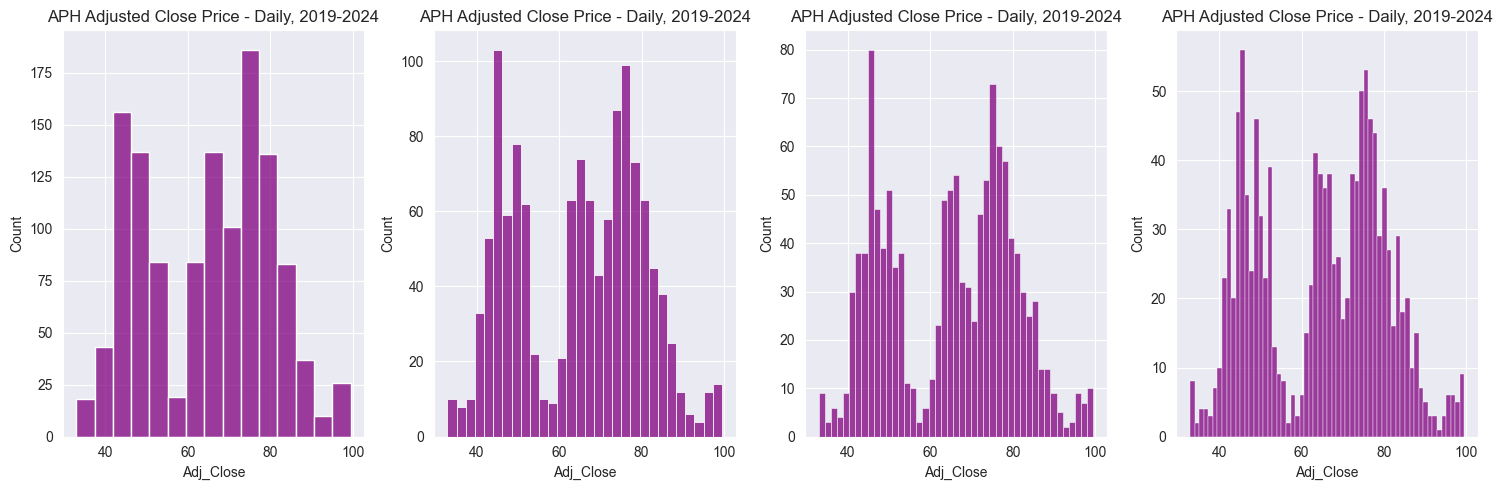

In [46]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Adj_Close'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Adjusted Close Price - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### __Net Returns__

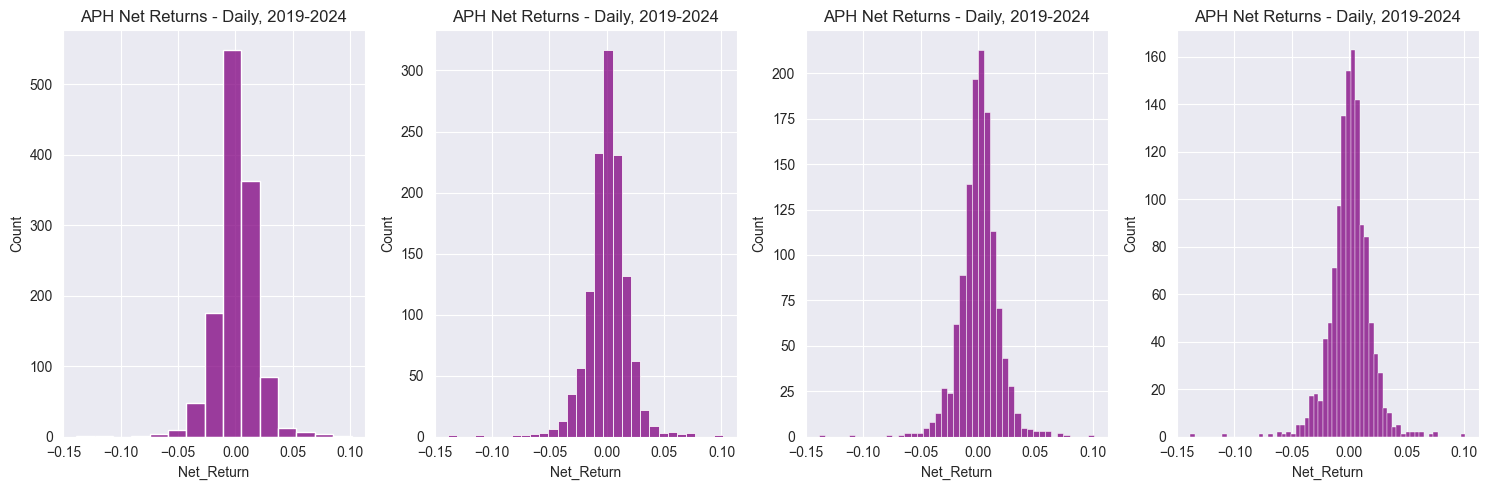

In [47]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Net_Return'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Net Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### __Log Returns__

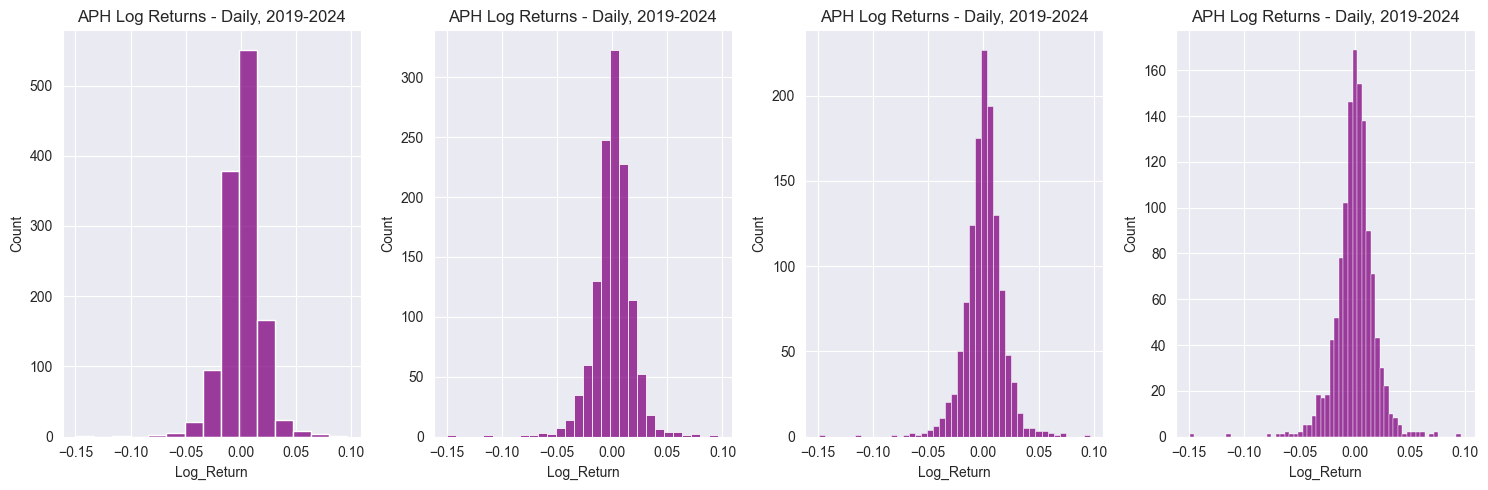

In [48]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Log_Return'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Log Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### __Root Returns__

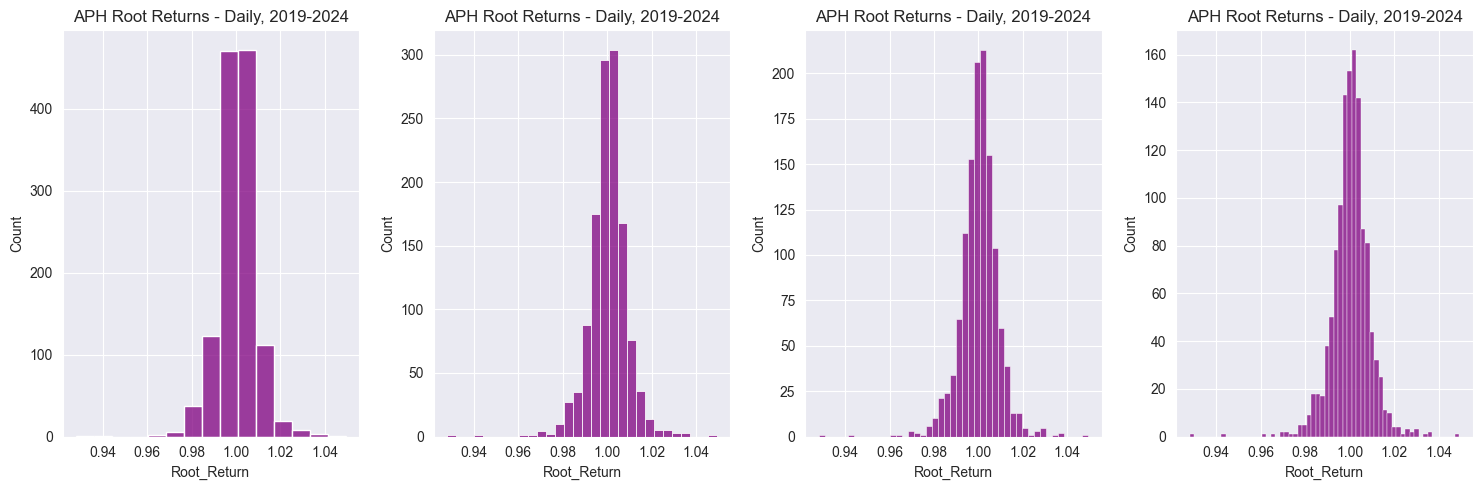

In [49]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Root_Return'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Root Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

For each of the distributions, as the bin size increases, the distribution's shape becomes clearer. The returns all seem to have a normal distribution, while the raw price data appears to have a multimodal distribution.

## The Kernel Density Estimator

TODO

## The Transformed Kernel Density Estimator

TODO